In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from datetime import datetime

In [2]:
data = pd.read_csv('/Users/marcos/Documents/00_Git_Projetos/SeriesTemporais/SeriesTemporais_Python/Download/Dados/AirPassengers.csv',
                   parse_dates=['Month'], index_col='Month') #, date_parser=dateparse)

In [3]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [5]:
fit1 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's Linear Trend")

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-5-66ee1c3669cf>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)


<AxesSubplot:xlabel='Month'>

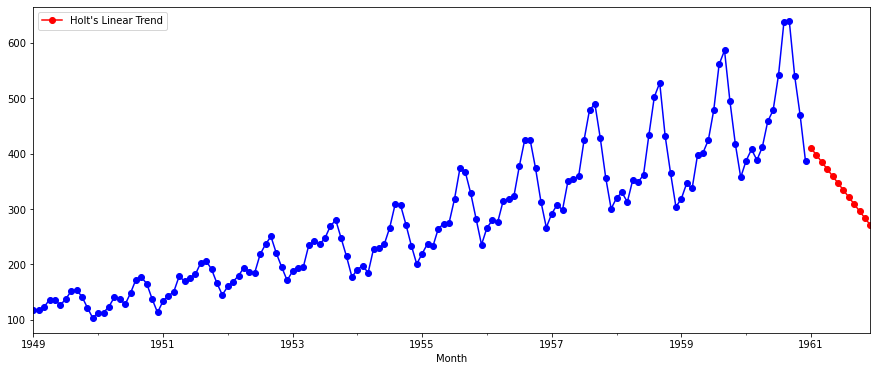

In [6]:
fit1.fittedvalues.plot(marker='o', color ='blue')
fcast1.plot(color='red', marker='o', legend=True)

In [7]:
fit2 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast2 = fit2.forecast(12).rename("Aditivo Amortecido")

<ipython-input-7-ad4c6264d694>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit2 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-7-ad4c6264d694>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit2 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)


<AxesSubplot:xlabel='Month'>

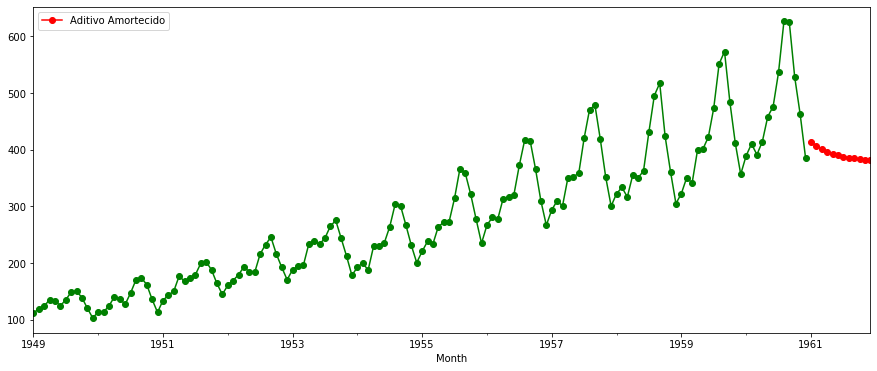

In [8]:
fit2.fittedvalues.plot(marker='o', color ='green')
fcast2.plot(color='red', marker='o', legend=True)